In [1]:
# Make sure that the path is the root of the project (it can be checked with '%pwd')

%cd ..

C:\Users\juan\Documents\Maestria\passing-networks-in-python


In [18]:
%pwd

'C:\\Users\\juan\\Documents\\Maestria\\passing-networks-in-python'

In [19]:
%ls

 El volumen de la unidad C es Windows
 El número de serie del volumen es: A0D1-5A2C

 Directorio de C:\Users\juan\Documents\Maestria\passing-networks-in-python

03/07/2021  20:15    <DIR>          .
03/07/2021  20:15    <DIR>          ..
03/07/2021  18:42             1.964 .gitignore
03/07/2021  20:15    <DIR>          .ipynb_checkpoints
03/07/2021  20:17    <DIR>          __pycache__
03/07/2021  18:42             1.372 create_sample_plots.sh
03/07/2021  19:05    <DIR>          data
03/07/2021  18:42             1.107 LICENSE
03/07/2021  18:42    <DIR>          plots
03/07/2021  18:42             6.526 prepare_vaep.py
03/07/2021  18:42    <DIR>          processing

In [20]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from utils import read_json
import json


03/07/2021  18:42             3.075 README.md
03/07/2021  18:42                84 requirements.txt
03/07/2021  18:42             1.076 run.py
03/07/2021  20:12    <DIR>          TP
03/07/2021  19:31             5.616 utils.py
03/07/2021  19:17    <DIR>          visualization
               8 archivos         20.820 bytes
               9 dirs  27.109.498.880 bytes libres


In [21]:
lineups_path = "data/eventing/lineups/{0}.json"
events_path = "data/eventing/events/{0}.json"

team_name = "Argentina"
match_id = 7545

### Step 1: Read data

In [22]:
def read(path):
    '''
    Read content of a file
    '''
    with open(path, 'r', encoding="utf8") as f:
        return f.read()

In [23]:
lineups = json.loads(read(lineups_path.format(match_id)))
names_dict = {player["player_name"]: player["player_nickname"]
              for team in lineups for player in team["lineup"]}

names_dict

{'Ángel Fabián Di María Hernández': 'Ángel Di María',
 'Nicolás Hernán Otamendi': 'Nicolás Otamendi',
 'Sergio Leonel Agüero del Castillo': 'Sergio Agüero',
 'Giovani Lo Celso': None,
 'Faustino Marcos Alberto Rojo': 'Marcos Rojo',
 'Wilfredo Daniel Caballero': 'Willy Caballero',
 'Cristian David Pavón': 'Cristian Pavón',
 'Gonzalo Gerardo Higuaín': 'Gonzalo Higuaín',
 'Maximiliano Eduardo Meza': 'Maximiliano Meza',
 'Lionel Andrés Messi Cuccittini': 'Lionel Messi',
 'Éver Maximiliano David Banega': 'Éver Banega',
 'Javier Alejandro Mascherano': 'Javier Mascherano',
 'Nicolás Alejandro Tagliafico': 'Nicolás Tagliafico',
 'Lucas Rodrigo Biglia': 'Lucas Biglia',
 'Eduardo Antonio Salvio': 'Eduardo Salvio',
 'Enzo Nicolás Pérez': 'Enzo Pérez',
 'Gabriel Iván Mercado': 'Gabriel Mercado',
 'Paulo Bruno Exequiel Dybala': 'Paulo Dybala',
 'Franco Armani': None,
 'Federico Julián Fazio': 'Federico Fazio',
 'Cristian Daniel Ansaldi': 'Cristian Ansaldi',
 'Marcos Javier Acuña': 'Marcos Acuña',
 

In [24]:
events = json.loads(read(events_path.format(match_id)))
df_events = json_normalize(events, sep="_").assign(match_id=match_id)

df_events.head()

<ipython-input-24-fc018e061e5e>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_events = json_normalize(events, sep="_").assign(match_id=match_id)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,shot_aerial_won,ball_recovery_offensive,injury_stoppage_in_chain,pass_goal_assist,pass_deflected,bad_behaviour_card_id,bad_behaviour_card_name,match_id
0,0cda3a8c-dfe2-452c-b16c-43dbce0ab58c,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
1,c803985a-fe3c-445b-b6ad-3b0bfc320f57,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
2,c1e04236-b06f-493a-bd7c-ba7dc821b77b,3,1,00:00:00.000,0,0,1,5.000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
3,d7b6ad37-d306-43b1-9b65-9035207ec65c,4,1,00:00:00.000,0,0,1,9.720,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
4,8cb5ed81-52f6-4469-acc9-f370799f922d,5,1,00:00:00.380,0,0,2,0.893,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545


### Step 2: Compute max. minutes

In [25]:
first_red_card_minute = df_events[df_events.foul_committed_card_name.isin(["Second Yellow", "Red Card"])].minute.min()
first_substitution_minute = df_events[df_events.type_name == "Substitution"].minute.min()
max_minute = df_events.minute.max()

num_minutes = min(first_substitution_minute, first_red_card_minute, max_minute)
num_minutes

53

### Step 3: Set text information

In [26]:
plot_name = "statsbomb_match{0}_{1}".format(match_id, team_name)

opponent_team = [x for x in df_events.team_name.unique() if x != team_name][0]
plot_title ="{0}'s passing network against {1} (StatsBomb eventing data)".format(team_name, opponent_team)

plot_legend = "Location: pass origin\nSize: number of passes\nColor: number of passes"

### Step 4: Prepare data

In [27]:
def _statsbomb_to_point(location, max_width=120, max_height=80):
    '''
    Convert a point's coordinates from a StatsBomb's range to 0-1 range.
    '''
    return location[0] / max_width, 1-(location[1] / max_height)

In [28]:
df_passes = df_events[(df_events.type_name == "Pass") &
                      (df_events.pass_outcome_name.isna()) &
                      (df_events.team_name == team_name) &
                      (df_events.minute < num_minutes)].copy()

# If available, use player's nickname instead of full name to optimize space in plot
df_passes["pass_recipient_name"] = df_passes.pass_recipient_name.apply(lambda x: names_dict[x] if names_dict[x] else x)
df_passes["player_name"] = df_passes.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

df_passes.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,shot_aerial_won,ball_recovery_offensive,injury_stoppage_in_chain,pass_goal_assist,pass_deflected,bad_behaviour_card_id,bad_behaviour_card_name,match_id
37,66eac311-3f32-4426-a268-cdf057abc269,38,1,00:00:21.753,0,21,3,0.640,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
42,0e9f388b-dc9b-4dbc-aacd-1e38de7c82de,43,1,00:00:25.433,0,25,3,0.880,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
46,4e7e6a9d-6997-4899-8125-ff69796e75f9,47,1,00:00:30.100,0,30,3,1.373,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
48,1f502a3e-d6f8-4a07-96a9-7055c2f82073,49,1,00:00:31.473,0,31,3,0.640,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
51,fa27a711-77f7-40c7-bec2-fabcbfeacc27,52,1,00:00:32.913,0,32,3,1.240,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545


In [29]:
df_passes["origin_pos_x"] = df_passes.location.apply(lambda x: _statsbomb_to_point(x)[0])
df_passes["origin_pos_y"] = df_passes.location.apply(lambda x: _statsbomb_to_point(x)[1])
player_position = df_passes.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})

player_position

,origin_pos_x,origin_pos_y
player_name,,
Eduardo Salvio,0.658333,0.10000
Enzo Pérez,0.554167,0.69375
Gabriel Mercado,0.458333,0.18125
Javier Mascherano,0.441667,0.51250
Lionel Messi,0.725000,0.50000
Marcos Acuña,0.516667,0.92500
Maximiliano Meza,0.645833,0.83125
Nicolás Otamendi,0.391667,0.39375
Nicolás Tagliafico,0.441667,0.83750


In [30]:
player_pass_count = df_passes.groupby("player_name").size().to_frame("num_passes")
player_pass_value = df_passes.groupby("player_name").size().to_frame("pass_value")

player_pass_count

,num_passes
player_name,
Eduardo Salvio,18
Enzo Pérez,34
Gabriel Mercado,30
Javier Mascherano,25
Lionel Messi,16
Marcos Acuña,15
Maximiliano Meza,14
Nicolás Otamendi,42
Nicolás Tagliafico,40


In [31]:
df_passes["pair_key"] = df_passes.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
pair_pass_count = df_passes.groupby("pair_key").size().to_frame("num_passes")
pair_pass_value = df_passes.groupby("pair_key").size().to_frame("pass_value")

pair_pass_count.head(10)

,num_passes
pair_key,
Eduardo Salvio_Enzo Pérez,4
Eduardo Salvio_Gabriel Mercado,10
Eduardo Salvio_Javier Mascherano,2
Eduardo Salvio_Lionel Messi,5
Eduardo Salvio_Maximiliano Meza,2
Eduardo Salvio_Nicolás Otamendi,6
Eduardo Salvio_Nicolás Tagliafico,1
Eduardo Salvio_Sergio Agüero,3
Eduardo Salvio_Willy Caballero,2


### Step 5: Plot passing network

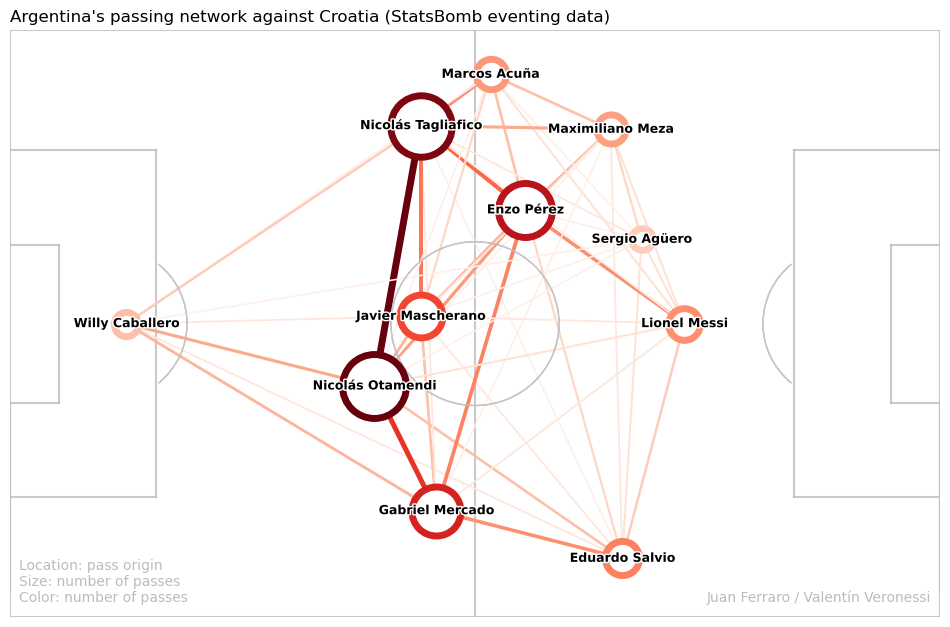

In [32]:
from visualization.passing_network import draw_pitch, draw_pass_map
import matplotlib.pyplot as plt


ax = draw_pitch()
ax = draw_pass_map(ax, player_position, player_pass_count, player_pass_value,
              pair_pass_count, pair_pass_value, plot_title, plot_legend)

plt.savefig("TP/{0}.png".format(plot_name))

### Step 6: Create graph

In [34]:
import networkx as nx
import igraph as ig

In [42]:
df_passes_clean = df_passes.copy()

for column in df_passes.columns:
    if df_passes_clean[column].isna().sum() != 0:
        df_passes_clean.drop(column, inplace=True, axis=1)

In [38]:
relations = df_passes_clean.groupby(["pass_recipient_name", "player_name"]).size().to_frame('total_passes').reset_index()
relations

,pass_recipient_name,player_name,total_passes
0,Eduardo Salvio,Enzo Pérez,2
1,Eduardo Salvio,Gabriel Mercado,5
2,Eduardo Salvio,Javier Mascherano,2
3,Eduardo Salvio,Lionel Messi,2
4,Eduardo Salvio,Nicolás Otamendi,3
...,...,...,...
76,Willy Caballero,Eduardo Salvio,1
77,Willy Caballero,Gabriel Mercado,6
78,Willy Caballero,Javier Mascherano,1
79,Willy Caballero,Nicolás Otamendi,6


In [79]:
g = nx.from_pandas_edgelist(relations, 'pass_recipient_name', 'player_name', edge_attr='total_passes', create_using=None)
g

In [81]:
nx.get_edge_attributes(g, "total_passes")

{('Eduardo Salvio', 'Enzo Pérez'): 2,
 ('Eduardo Salvio', 'Gabriel Mercado'): 5,
 ('Eduardo Salvio', 'Javier Mascherano'): 2,
 ('Eduardo Salvio', 'Lionel Messi'): 3,
 ('Eduardo Salvio', 'Nicolás Otamendi'): 3,
 ('Eduardo Salvio', 'Nicolás Tagliafico'): 1,
 ('Eduardo Salvio', 'Sergio Agüero'): 2,
 ('Eduardo Salvio', 'Willy Caballero'): 1,
 ('Eduardo Salvio', 'Maximiliano Meza'): 2,
 ('Enzo Pérez', 'Gabriel Mercado'): 6,
 ('Enzo Pérez', 'Javier Mascherano'): 3,
 ('Enzo Pérez', 'Lionel Messi'): 3,
 ('Enzo Pérez', 'Marcos Acuña'): 3,
 ('Enzo Pérez', 'Maximiliano Meza'): 5,
 ('Enzo Pérez', 'Nicolás Otamendi'): 6,
 ('Enzo Pérez', 'Nicolás Tagliafico'): 6,
 ('Enzo Pérez', 'Sergio Agüero'): 1,
 ('Gabriel Mercado', 'Javier Mascherano'): 2,
 ('Gabriel Mercado', 'Maximiliano Meza'): 1,
 ('Gabriel Mercado', 'Nicolás Otamendi'): 9,
 ('Gabriel Mercado', 'Nicolás Tagliafico'): 1,
 ('Gabriel Mercado', 'Willy Caballero'): 6,
 ('Gabriel Mercado', 'Lionel Messi'): 2,
 ('Javier Mascherano', 'Marcos Acuña'

In [46]:
len(g.nodes), len(g.edges)

(11, 49)

In [98]:
visual = {}
visual["font_size"] = 10
visual["alpha"] = 0.5
visual["edge_color"] ="gray"
grados = nx.degree(g, weight='total_passes')
visual["node_size"] = [100 * grados[nodo] for nodo in g]

#visual["node_color"] = list(nx.degree(g))
visual["cmap"] = plt.cm.autumn  # c(olor) map para los nodos
vuelos = nx.get_edge_attributes(g, "total_passes")
visual["width"] = [(0.025 * vuelos[arista])**0.5 for arista in g.edges()]

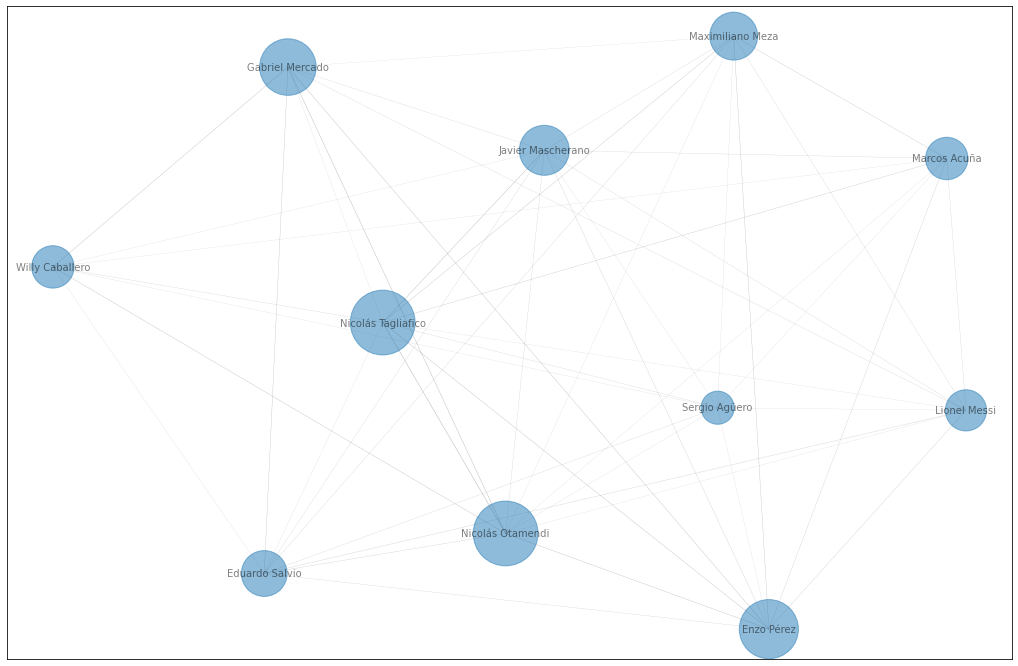

In [99]:
fig, ax = plt.subplots(figsize=(18, 12))
nx.draw_networkx(g, **visual)